In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
train_data = pd.read_csv("../input/titanic/train.csv", index_col="PassengerId")
test_data = pd.read_csv("../input/titanic/test.csv", index_col="PassengerId")


In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_data.shape

(891, 11)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.drop('Cabin', axis = 1 , inplace=True)

In [10]:
train_data["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

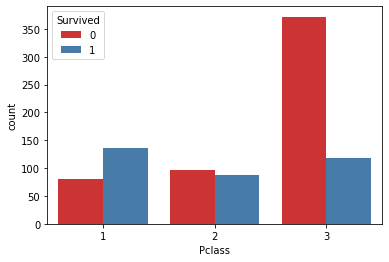

In [14]:
sns.countplot(x='Pclass' , data=train_data , hue='Survived',palette ='Set1')


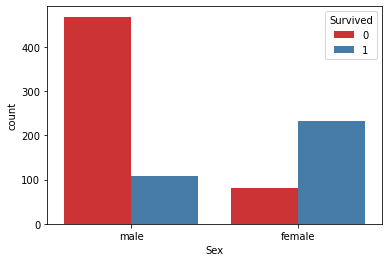

In [15]:
sns.countplot(x='Sex' , data=train_data , hue='Survived',palette ='Set1')


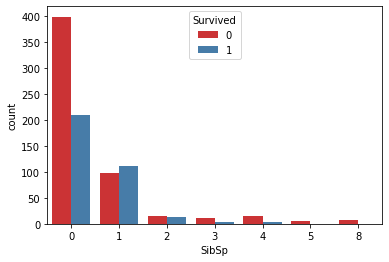

In [16]:
sns.countplot(x='SibSp' , data=train_data , hue='Survived',palette ='Set1')


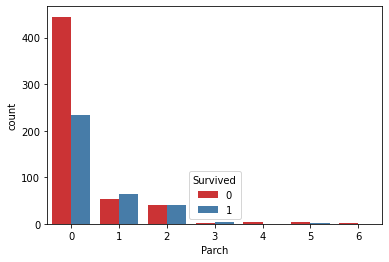

In [17]:

sns.countplot(x='Parch' , data=train_data , hue='Survived',palette ='Set1')


In [18]:
from sklearn.base import BaseEstimator , TransformerMixin
class DataFrameSelect(BaseEstimator , TransformerMixin) :
    def __init__(self , attribute) :
        self.attribute = attribute
    def fit(self , X , y=None) :
        return self
    def transform(self , X) :
        return X[self.attribute]
    

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pip =Pipeline([
    ('select_num' , DataFrameSelect(['Age','SibSp','Parch','Fare'])),
    ('imputer' ,SimpleImputer(strategy='median'))
])

In [20]:
num_pip.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [21]:
class MostFreq(BaseEstimator , TransformerMixin) :
    def fit(self , X , y=None) :
        self.fill_most_=pd.Series([X[c].value_counts().index[0] for c in X] ,
        index =X.columns)
        return self
    def transform(self , X) :
        return X.fillna(self.fill_most_)

In [22]:
from sklearn.preprocessing import OneHotEncoder


In [23]:
cat_pip=Pipeline([
    ('select_cat' , DataFrameSelect(['Pclass' ,'Sex' ,'Embarked'])) ,
    ('cat_imputer' ,MostFreq()),
    ('hot' , OneHotEncoder(sparse=False))
])

In [24]:
cat_pip.fit_transform(train_data)


array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [25]:
from sklearn.pipeline import FeatureUnion
final=FeatureUnion(transformer_list=[
    ('num' , num_pip),
    ('cat' , cat_pip)
])

In [26]:
X_train = final.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [27]:
y_train = train_data["Survived"]


In [28]:
from sklearn.svm import SVC
svc=SVC(gamma='auto')
svc.fit(X_train , y_train)

SVC(gamma='auto')

In [29]:
X_test=final.fit_transform(test_data)
y_pred=svc.predict(X_test)

In [30]:
from sklearn.model_selection import cross_val_score
svc_scores = cross_val_score(svc , X_train ,y_train , cv = 10 )


In [31]:
svc_scores.mean()

0.7329588014981274

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150 , random_state=42)

In [33]:
rfc_scores = cross_val_score(rfc , X_train ,y_train , cv = 10 )
rfc_scores.mean()

0.8081647940074905

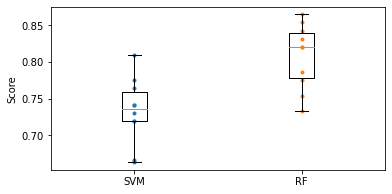

In [34]:
plt.figure(figsize=(6,3))
plt.plot([1]*10 , svc_scores , '.')
plt.plot([2]*10 , rfc_scores , '.')
plt.boxplot([svc_scores,rfc_scores] , labels =('SVM' , 'RF'))
plt.ylabel('Score')
plt.show()

In [35]:
train_data['AgeRange']=train_data['Age']//15*15
train_data[['AgeRange','Survived']].groupby(['AgeRange']).mean()

,Survived
AgeRange,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [36]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [37]:
train_data["Relatives"] = train_data["Parch"]+train_data["SibSp"]
train_data[["Relatives", "Survived"]].groupby(['Relatives']).mean()

,Survived
Relatives,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
